# Data Cleaning

This document outlines the steps taken to clean and prepare the dataset for analysis. Below, each decision is explained in the context of these questions and the EDA.

Please ensure before running the below to load the original dataset, 'cleaned.csv', to your local machine.

In [93]:
import pandas as pd

In [94]:
# Load the dataset to perform data cleaning
file_path = '/content/cleaned.csv'
data = pd.read_csv(file_path)

# Print the first entries to see what the data looks like
data.head()

,Unnamed: 0,name,main_category,sub_category,ratings,no_of_ratings,discount_price,actual_price
0,0,Lloyd 1.5 Ton 3 Star Inverter Split Ac (5 In 1...,appliances,Air Conditioners,4.2,"2,255","₹32,999","₹58,990"
1,1,LG 1.5 Ton 5 Star AI DUAL Inverter Split AC (C...,appliances,Air Conditioners,4.2,"2,948","₹46,490","₹75,990"
2,2,LG 1 Ton 4 Star Ai Dual Inverter Split Ac (Cop...,appliances,Air Conditioners,4.2,"1,206","₹34,490","₹61,990"
3,3,LG 1.5 Ton 3 Star AI DUAL Inverter Split AC (C...,appliances,Air Conditioners,4,69,"₹37,990","₹68,990"
4,4,Carrier 1.5 Ton 3 Star Inverter Split AC (Copp...,appliances,Air Conditioners,4.1,630,"₹34,490","₹67,790"


I removed the “Unnamed: 0” column, which was an index column automatically created during file export. It does not provide any useful information for our analysis and is not necessary for answering any of our questions. Removing it also streamlined our dataset for analysis, making it easier to search for data via the “name” column.

In [95]:
# Drop the 'Unnamed: 0' column if it exists
if 'Unnamed: 0' in data.columns:
    data_cleaned = data.drop(columns=['Unnamed: 0'])
else:
    data_cleaned = data.copy()

Rows with all null values were removed. These rows provide no meaningful information for consumer rating or item price, and would add unnecessary size to the dataset without contributing to the analysis. We also removed the rows with null/empty values for price, as having the price is necessary for answering questions regarding sales trends.

In [96]:
# Drop rows with all null values
data_cleaned = data_cleaned.dropna(how='all')

# Drop rows without an actual price.
data_cleaned = data_cleaned.dropna(subset=['discount_price', 'actual_price'])

`Discount_price` and the remaining `actual_price` columns were converted from string format (with currency symbols and commas) to numeric values. The `ratings` and `no_of_ratings` columns were also cleaned and converted to numeric, removing commas and handling missing values.

Numeric prices are necessary for performing operations like summing, calculating averages, and identifying the most or least purchased items based on price and discount. By converting them all to a standardised format, it makes it easier for us to conduct analyses. Similarly, numeric ratings allow us to assess the popularity of items within specific categories in a standardised manner.

This helps us to perform data analysis for the following questions:
- Fitness: Determining the best-selling products based on price and discount.
- Travel: Identifying trends in travel-related purchases based on their price.
- Movies/Books: Identifying the most popular films and books based on their ratings and sales.
- Luxury/Beauty: Assessing luxury and discounted purchases using actual and discount prices.

There was an error raised initially due to some values in the numeric columns not containing numerical values. Even with the conversion to numeric, some entries remained. ``errors = 'coerce'`` is used to automatically convert all invalid values to ``NaN`` (https://www.geeksforgeeks.org/python-pandas-to_numeric-method/).

In [97]:
# Convert price columns to numeric, strip symbols and commas
data_cleaned['discount_price'] = pd.to_numeric(data_cleaned['discount_price'].str.replace('₹', '').str.replace(',', ''), errors='coerce')
data_cleaned['actual_price'] = pd.to_numeric(data_cleaned['actual_price'].str.replace('₹', '').str.replace(',', ''), errors='coerce')

# Convert ratings and number of ratings to numeric
data_cleaned['ratings'] = pd.to_numeric(data_cleaned['ratings'], errors='coerce')
data_cleaned['no_of_ratings'] = pd.to_numeric(data_cleaned['no_of_ratings'].str.replace(',', ''), errors='coerce')

To remove null values from our dataset, any empty `no_of_ratings` columns were converted to 0.

In [98]:
# When 'ratings' or 'no_of_ratings' is null, they are replaced with 0
data_cleaned['no_of_ratings'] = data_cleaned['no_of_ratings'].fillna(0)

Outliers in the `discount_price` column were removed using the IQR (Interquartile Range) method. The lower and upper bounds were calculated based on 1.5 times the IQR https://www.khanacademy.org/math/statistics-probability/summarizing-quantitative-data/box-whisker-plots/a/identifying-outliers-iqr-rule.

Outliers in pricing can significantly skew analysis, particularly when analysing sales trends. Removing extreme values will help us focus on the typical price range for products, leading to more accurate insights into best-selling products and popular discounts. Furthermore, when assessing which luxury items or discounted items were the most popular, removing outliers ensures that extreme price points (which may be errors or anomalies) don't distort our results.

In [99]:
# Outlier removal using IQR method for prices
Q1 = data_cleaned['discount_price'].quantile(0.25)
Q3 = data_cleaned['discount_price'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Removing outliers from the discount_price column
data_cleaned = data_cleaned[(data_cleaned['discount_price'] >= lower_bound) & (data_cleaned['discount_price'] <= upper_bound)]

I removed the “Unnamed: 0” column, which was an index column automatically created during file export. It does not provide any useful information for our analysis and is not necessary for answering any of our questions. Removing it also streamlined our dataset for analysis, making it easier to search for data via the “name” column.

In [100]:
# Save the cleaned dataset
cleaned_file_path = '/content/final_cleaned.csv'
data_cleaned.to_csv(cleaned_file_path, index=False)

# Visualisations
In the following, we will show the difference in results after cleaning the dataset using visualisations. This is to check how the results vary based on the data cleanign process and identify any potential errors in the cleaning process.

In [101]:
import matplotlib.pyplot as plt

# Load the old dataset
old_data = pd.read_csv("cleaned.csv")

# Load the new dataset (cleaned version)
new_data = pd.read_csv("final_cleaned.csv")

# 'Ratings' was not in numeric for the old dataset as it had not yet been converted to numeric values, unlike the new dataset which had the numbers converted during the data cleaning process. For the purposes of creating the visualisations, old data is converted to numeric.
old_data['ratings'] = pd.to_numeric(old_data['ratings'], errors='coerce')
old_data['no_of_ratings'] = pd.to_numeric(old_data['no_of_ratings'], errors='coerce')

**The Number of Products by Rating in Each Dataset**

The following viusalisation will compare how many products there are of each rating in both dataset. This is to show what amount of products were removed in the data cleaning process.

The following was used in the data binning process: https://pandas.pydata.org/docs/reference/api/pandas.cut.html


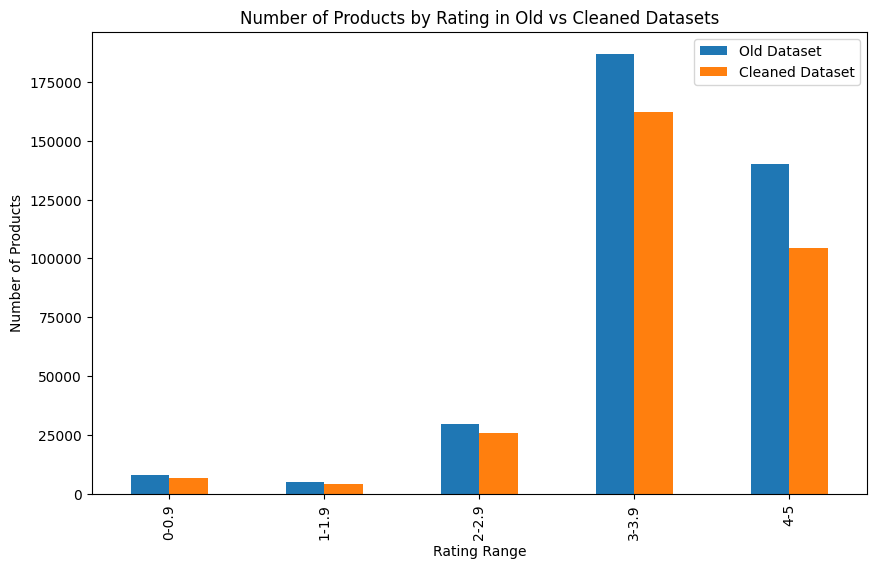

In [102]:
# Define bins for the ratings, including bin edges and labels
bins = [0, 1, 2, 3, 4, 5]
labels = ['0-0.9', '1-1.9', '2-2.9', '3-3.9', '4-5']

# Bin the ratings in both datasets
old_data['rating_bins'] = pd.cut(old_data['ratings'], bins=bins, labels=labels)
new_data['rating_bins'] = pd.cut(new_data['ratings'], bins=bins, labels=labels)

# Count the number of products in each bin for both datasets. The sort function ensures that the bins are in order by label, not by bin size
old_ratings_count = old_data['rating_bins'].value_counts(sort=False)
new_ratings_count = new_data['rating_bins'].value_counts(sort=False)

# Combine the counts into a data frame for comparison
ratings_comparison = pd.DataFrame({
    'Old Dataset': old_ratings_count,
    'Cleaned Dataset': new_ratings_count
})

# Plot the comparison
ratings_comparison.plot(kind='bar', figsize=(10, 6))
plt.title('Number of Products by Rating in Old vs Cleaned Datasets')
plt.xlabel('Rating Range')
plt.ylabel('Number of Products')
plt.show()

As can be seen from the above visualisation, cleaning the dataset reduced the number of products in each rating. Ratings between 3-3.9 and 4-5 reduced the most. However, this can be attributed to there being more ratings overall in these two categories, causing there to be more entries available to cut.

This indicates that cleaning the dataset, e.g. removing products with empty values, did indeed remove items in a way that does not appear abnormal. This would have been identified by the cleaned dataset having more entries for some ratings than the old dataset, indicating that there is some issue with the counts in the cleaning process or values for items were changed.

The average rating is shown below, with the mean going down by 0.03 as a result of the cleaning process.

In [103]:
# Calculate average rating for both datasets
old_avg_rating = old_data['ratings'].mean()
new_avg_rating = new_data['ratings'].mean()

# Print the results
print(f"Average rating in old dataset: {old_avg_rating:.2f}")
print(f"Average rating in cleaned dataset: {new_avg_rating:.2f}")

Average rating in old dataset: 3.83
Average rating in cleaned dataset: 3.80


**The Distribution of Price Before and After Cleaning**

The following distribution will show how the price of products changed in both datasets. This was computed for `actual_price` and not `discount_price` as not all entries have a value for their discounted price, but every entry in the cleaned dataset has a value for their actual price.

The following will plot the total frequency of certain price points in different ranges. This means each peak represents a number of items that cost a certain price value along the x-axis.

In [104]:
# It was necessary for this part of the data cleaning to be computed for the old data, as it was not possible to plot non-numeric values or values with currency/commas.
old_data['actual_price'] = pd.to_numeric(old_data['actual_price'].str.replace('₹', '').str.replace(',', ''), errors='coerce')

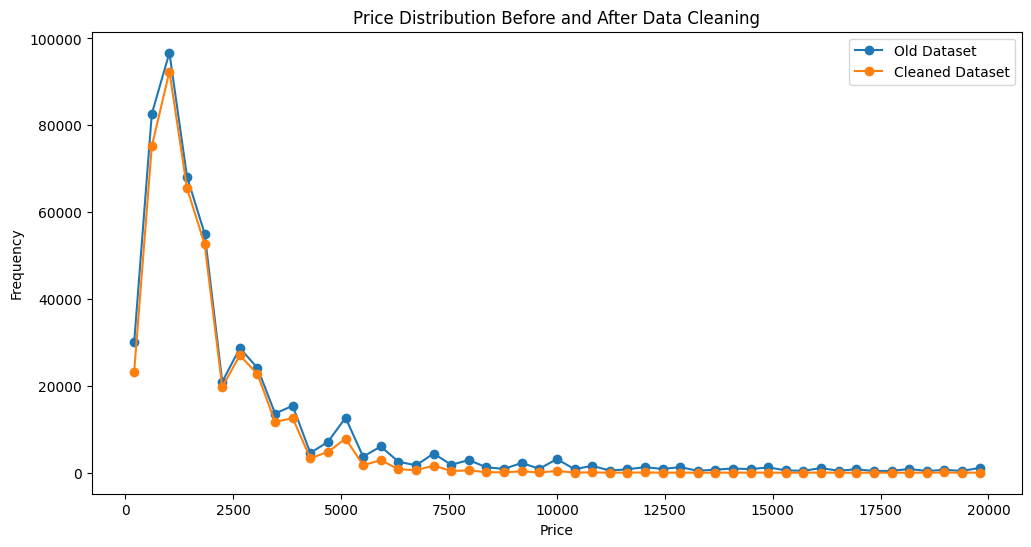

In [105]:
import numpy as np

# Products with zero price were excluded and an upper limit was set for histogram readability. The highest points are anomalously high (100000 rs+) compared to the lower values.
# So the distribution is plotted for values less than 50000 rs, with a dropoff still being visible on the resulting histogram.
old_filtered = old_data[(old_data['actual_price'] > 0) & (old_data['actual_price'] < 20000)]
new_filtered = new_data[(new_data['actual_price'] > 0) & (new_data['actual_price'] < 20000)]

# For readability, 50 bins are generated for values along the x-axis between 0 and 20,000. Beyond 20,000, there is a steep drop-off which makes it harder to read the difference in price distribution between both datasets.
bins = np.linspace(0, 20000, 50)

# Calculate the frequency (histogram) for the old and new data's x and y points. https://numpy.org/doc/stable/reference/generated/numpy.histogram.html
old_hist, bin_edges = np.histogram(old_filtered['actual_price'], bins=bins)
new_hist, bin_edges = np.histogram(new_filtered['actual_price'], bins=bins)

# Plot the line plot for both datasets
plt.figure(figsize=(12, 6))

# Calculate bin centers for easier plotting https://matplotlib.org/1.2.1/examples/api/histogram_demo.html
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

# Plot line plot
plt.plot(bin_centers, old_hist, label='Old Dataset', marker='o')
plt.plot(bin_centers, new_hist, label='Cleaned Dataset', marker='o')

# Add titles and labels
plt.title('Price Distribution Before and After Data Cleaning')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.legend()

# Show plot
plt.show()


In the plot, the number of items priced at ₹10,000 and below has decreased visibly more in the cleaned dataset compared to the old dataset. This suggests that many of the items removed during the cleaning process, whether due to being outliers or missing price values, were more commonly found among lower-priced products. Since the old dataset had a higher concentration of lower-priced items, a larger portion of the removed items fell within this price range, resulting in a noticeable reduction in that part of the distribution.

In [106]:
# Calculate average rating for both datasets
old_avg_price = old_data['actual_price'].mean()
new_avg_price = new_data['actual_price'].mean()

# Print the results
print(f"Average price in old dataset: ₹{old_avg_price:.2f}")
print(f"Average price in cleaned dataset: ₹{new_avg_price:.2f}")

Average price in old dataset: ₹23111.28
Average price in cleaned dataset: ₹25012.88


The average price increasing also implies that most unclean data was in the low price-range. This can be verified by the distribution of the plot at around ₹2500 visibly decreasing more-so than at beyond ₹12500 where the difference tapers off.